### Subtract convolved single lens magnification map (analytic) from this and then plot fractional deviations:
- Want to explore how small of a mass ratio you can detect the second planet
- Plot difference of this magnification map and most massive planet and star
- See how small you can make the small planet before it is nondetectable
- Later: add additional planets

### (Triple - binary) / binary
- Plot grid of changing seperation and planet mass ratio to see how deviation changes
- Later on explore multiple planets and then adding moons...
- Later later on add in orbital motion and see what happens

### Trajectories:
- Through fractional deviation map

## Importing relevant libraries and timing custom library imports

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import time as t

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as patches
import matplotlib.collections as collections

import sys
sys.path.append('..')

# Timing imports
start = t.time()
from IRSMicroLensing import IRSCaustics as IRSC
print(f"Import time: {t.time() - start:.2f} seconds")

start = t.time()
from IRSMicroLensing import IRSFunctions as IRSF
print(f"Import time: {t.time() - start:.2f} seconds")

start = t.time()
import VBMicrolensing
print(f"Import time: {t.time() - start:.2f} seconds")

Import time: 1.67 seconds
Import time: 0.00 seconds
Import time: 0.01 seconds


## Initializing VBMicrolensing

In [2]:
VBM = VBMicrolensing.VBMicrolensing()

# Set relative accuracy
VBM.RelTol = 1e-03
# Set accuracy
VBM.Tol=1e-03

## Defining binary lens attributes and finding the most optimal angular width and thickness to find all central caustics

In [8]:
# Big planet position
s1 = 0.8
alpha1 = 0

# Small planet position
s2 = s1
alpha2 = 30

# Small planet mass ratios
# upper_bound = -7
# lower_bound = -16

upper_bound = 10
lower_bound = 1

# Colormap
cmap = 'gray'

# Defining binary lens parameters
binary_lens_attributes = [
    [0, 0, 0.0001, 1],
    [s1*np.cos(np.deg2rad(alpha1)), s1*np.sin(np.deg2rad(alpha1)), 0.0001, 1e-3]
]

# Creating a list of all lenses
complete_lens_attributes = binary_lens_attributes.copy()

for i in range(upper_bound, lower_bound, -1):
    complete_lens_attributes.append(
        [s2*np.cos(np.deg2rad(alpha2)), s2*np.sin(np.deg2rad(alpha2)), 0.01, i * 1e-4] # Small mass
    )

# Finding best angular width and thickness
ang_width, thickness, (y_plus, y_minus), caustic_cusps = IRSC.IRSCaustics.ang_width_thickness_calculator(lens_att=complete_lens_attributes)

print(y_plus, y_minus)
print(f"Angular width: {ang_width}")
print(f"Thickness: {thickness}")

1.030315425782361 -0.970576558378381
Angular width: 0.07680319680319682
Thickness: 0.059738867403980045


## Creating a list of lens attributes that includes each trinary configuration

In [9]:
# Probing mass space to see what the smallest mass detectable is
trinary_lens_attributes_list = []

for i in range(upper_bound, lower_bound, -1):
    trinary = binary_lens_attributes.copy()
    trinary.append(
        [s2*np.cos(np.deg2rad(alpha2)), s2*np.sin(np.deg2rad(alpha2)), 0.01, i * 1e-4] # Small mass
    )

    trinary_lens_attributes_list.append(trinary)

    print(trinary)

print(f'Number of trinary systems: {len(trinary_lens_attributes_list)}')

[[0, 0, 0.0001, 1], [np.float64(0.8), np.float64(0.0), 0.0001, 0.001], [np.float64(0.692820323027551), np.float64(0.39999999999999997), 0.01, 0.001]]
[[0, 0, 0.0001, 1], [np.float64(0.8), np.float64(0.0), 0.0001, 0.001], [np.float64(0.692820323027551), np.float64(0.39999999999999997), 0.01, 0.0009000000000000001]]
[[0, 0, 0.0001, 1], [np.float64(0.8), np.float64(0.0), 0.0001, 0.001], [np.float64(0.692820323027551), np.float64(0.39999999999999997), 0.01, 0.0008]]
[[0, 0, 0.0001, 1], [np.float64(0.8), np.float64(0.0), 0.0001, 0.001], [np.float64(0.692820323027551), np.float64(0.39999999999999997), 0.01, 0.0007]]
[[0, 0, 0.0001, 1], [np.float64(0.8), np.float64(0.0), 0.0001, 0.001], [np.float64(0.692820323027551), np.float64(0.39999999999999997), 0.01, 0.0006000000000000001]]
[[0, 0, 0.0001, 1], [np.float64(0.8), np.float64(0.0), 0.0001, 0.001], [np.float64(0.692820323027551), np.float64(0.39999999999999997), 0.01, 0.0005]]
[[0, 0, 0.0001, 1], [np.float64(0.8), np.float64(0.0), 0.0001, 0.

## Calculating binary magnification map

(5000, 5000) (5000, 5000)
Creating mesh grid: 0.057 seconds
1 0.1207728385925293
2 0.3099949359893799
3 3.5762786865234375e-05
4 3.814697265625e-06
5 2.86102294921875e-06
6 0.00018978118896484375
7 0.37232208251953125
9 3.0040740966796875e-05
10 2.09808349609375e-05
(5000, 5000) (5000, 5000)
Calculating source pixels: 0.822 seconds
(5000, 5000) (5000, 5000)
Calculating indices of translated pixel after deflection: 0.232 seconds
(5000, 5000) (5000, 5000)
(5000, 5000, 2)
Calculating translated pixels: 0.353 seconds
(12662311, 2) (12662311,)
Finding pixel repetitions and counts: 0.212 seconds
Incrementing pixel magnifications based on counts and repetitions: 0.057 seconds
Plotting magnification map: 0.036 seconds
---------------------
Total time: 1.78 seconds


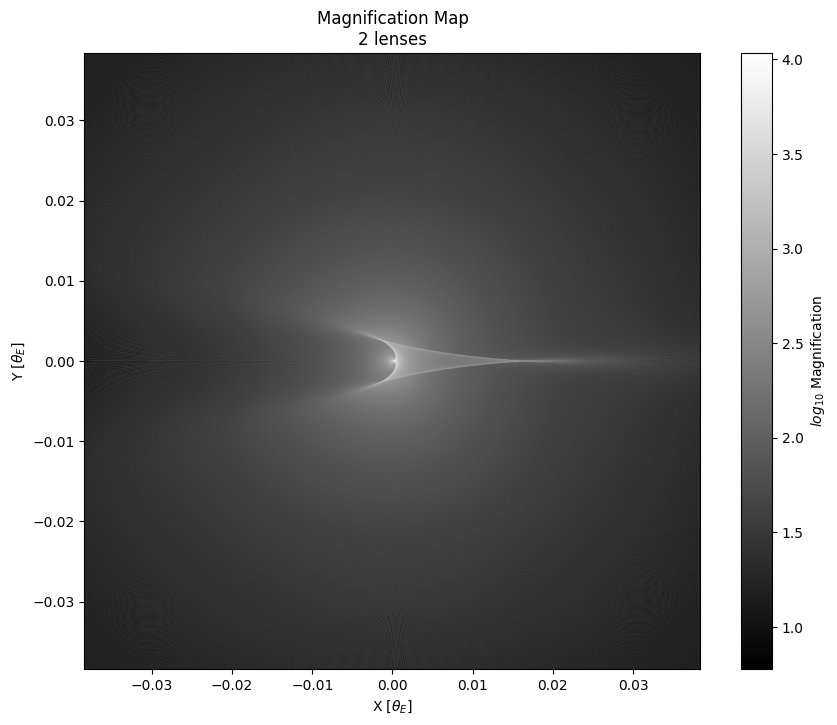

In [23]:
binary_param_dict = {'pixels': 1000, 'ang_width': ang_width, 'lens_att': binary_lens_attributes, 'thickness': thickness, 'num_r': 5000, 'num_theta': 5000, 'y_plus': y_plus, 'y_minus': y_minus}
binary_mag_map = IRSC.IRSCaustics(annulus_param_dict=binary_param_dict)

binary_magnifications = binary_mag_map.plot(show_lenses=False, cmap=cmap, cm_offset='auto', show_plot=True, show_dev=False, save_plot=False)

binary_parameters = [item for sublist in binary_lens_attributes for idx, item in enumerate(sublist) if idx != 2]
VBM.SetLensGeometry(binary_parameters)
binary_caustics = np.array(VBM.Multicaustics()[-1])
# binary_caustics = np.array(binary_caustics[-1])

plt.show()

## Single lens analytic magnification map

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

img = ax.imshow(np.log10(binary_mag_map.a_mags), cmap=cmap, extent=[-binary_mag_map.ang_width/2, binary_mag_map.ang_width/2, -binary_mag_map.ang_width/2, binary_mag_map.ang_width/2])
plt.colorbar(img, ax=ax, label='$log_{10}$ Magnification')

ax.set_title('Magnification Map of Single Lens')
ax.set_xlabel('X [$\\theta_E$]')
ax.set_ylabel('Y [$\\theta_E]$')

# fig.savefig('Single Lens Magnification Map.png', dpi=500)

plt.show()

## Single lens ray-shooting magnification map

In [9]:
single_param_dict = {'pixels': 1000, 'ang_width': ang_width, 'lens_att': [binary_lens_attributes[0]], 'thickness': thickness, 'num_r': 12000, 'num_theta': 3000}
single_mag_map = IRSC.IRSCaustics(annulus_param_dict=single_param_dict)

single_magnifications = single_mag_map.plot(show_lenses=False, cmap=cmap, show_plot=True, cm_offset='auto', show_dev=False, save_plot=False)

plt.show()

Creating mesh grid: 0.088 seconds
Calculating source pixels: 1.33 seconds
Calculating indices of translated pixel after deflection: 0.428 seconds
Calculating translated pixels: 1.076 seconds
Finding pixel repetitions and counts: 0.315 seconds
Incrementing pixel magnifications based on counts and repetitions: 0.159 seconds
Plotting magnification map: 0.097 seconds
---------------------
Total time: 3.506 seconds


/Users/saividyud/Documents/GitHub/NBLens/tests/../IRSMicroLensing/IRSCaustics.py:490: RuntimeWarning: divide by zero encountered in log10
  self.magnifications_log = np.log10(magnifications)


In [40]:
deviations = (binary_magnifications - single_magnifications) / single_magnifications

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
img = ax.imshow(deviations, cmap=cmap, extent=[-binary_mag_map.ang_width/2, binary_mag_map.ang_width/2, -binary_mag_map.ang_width/2, binary_mag_map.ang_width/2])

plt.show()

/var/folders/39/mb5cwg0x4h18n1y377g5rs9c0000gn/T/ipykernel_76228/990926543.py:1: RuntimeWarning: divide by zero encountered in divide
  deviations = (binary_magnifications - single_magnifications) / single_magnifications
/var/folders/39/mb5cwg0x4h18n1y377g5rs9c0000gn/T/ipykernel_76228/990926543.py:1: RuntimeWarning: invalid value encountered in divide
  deviations = (binary_magnifications - single_magnifications) / single_magnifications


## Defining source profile for convolution

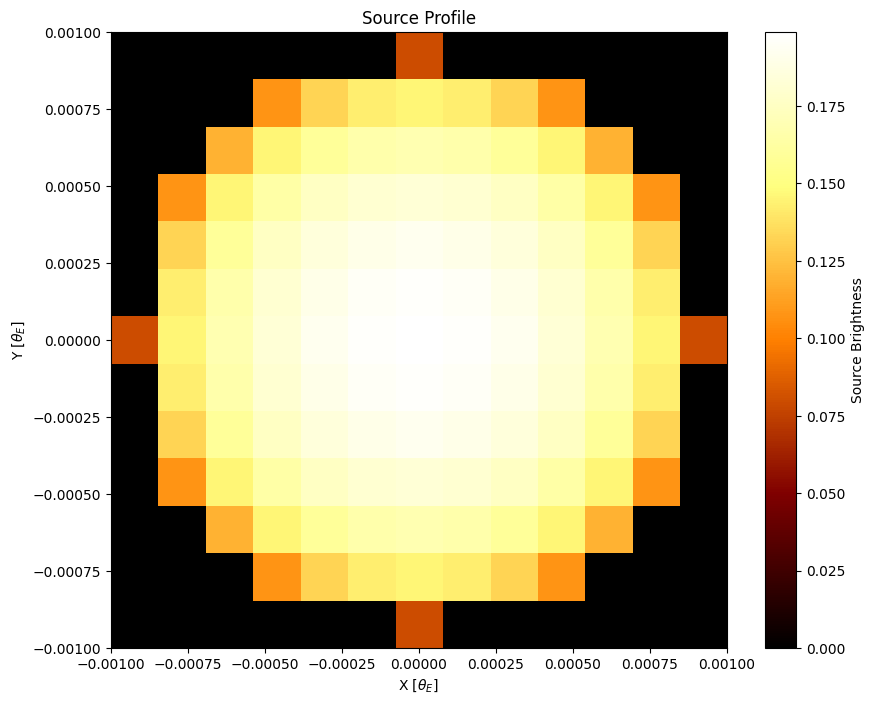

In [15]:
radius = 1e-3
LD = 0.5

source_profile = IRSF.IRSFunctions.source_profile(ang_res=binary_mag_map.param_dict['ang_res'], rad=radius, profile_type='LD', LD=LD)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
img = ax.imshow(source_profile, cmap='afmhot', extent=[-radius, radius, -radius, radius])
plt.colorbar(img, ax=ax, label='Source Brightness')

ax.set_xlabel('X [$\\theta_E$]')
ax.set_ylabel('Y [$\\theta_E$]')
ax.set_title('Source Profile')

ax.set_aspect('equal')

plt.show()

## Convolving binary brightnesses with source profile

Convolving source profile with magnification map: 0.031 seconds


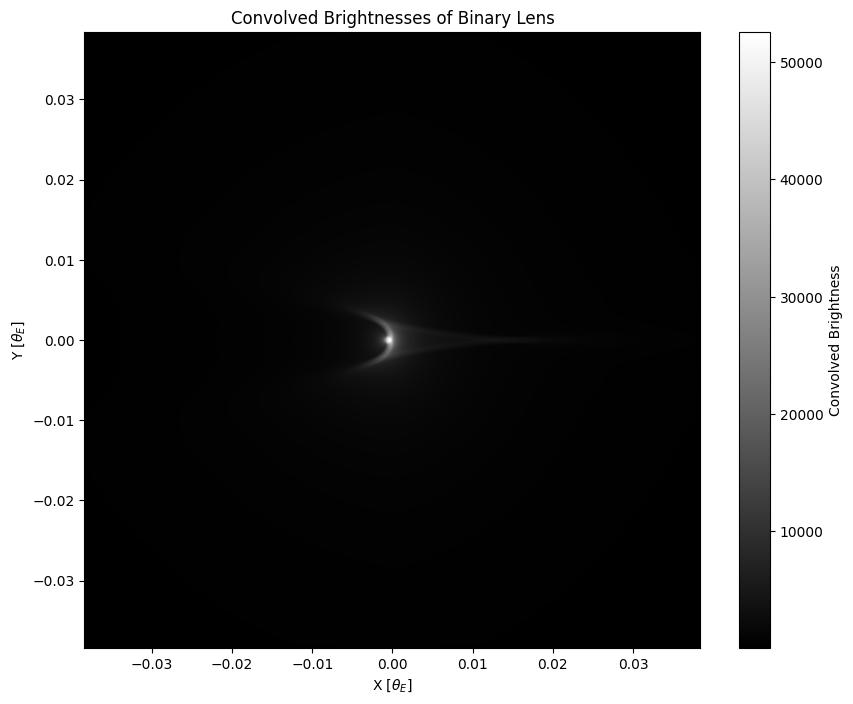

In [16]:
convolved_binary_brightnesses = binary_mag_map.convolve(source_profile=source_profile)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
img = ax.imshow(convolved_binary_brightnesses, cmap=cmap, extent=[-binary_mag_map.ang_width/2, binary_mag_map.ang_width/2, -binary_mag_map.ang_width/2, binary_mag_map.ang_width/2])
plt.colorbar(img, ax=ax, label='Convolved Brightness')

ax.set_title('Convolved Brightnesses of Binary Lens')
ax.set_xlabel('X [$\\theta_E$]')
ax.set_ylabel('Y [$\\theta_E]$')

plt.show()

## Calculating convolved brightnesses and their deviation from binary brightness for each trinary configuration

In [19]:
# Defining list of instances of IRSCaustics for trinary lens
trinary_mag_map_list = []

# Creating a list of convolved brightnesses for each trinary lens
convolved_trinary_brightnesses_list = []

# List of convolved brightness difference for each trinary lens
convolved_brightness_differences_list = []

# List of x and y positions for each caustic curve
trinary_caustics_list = []

# Main for loop for each trinary lens configuration
for i in range(len(trinary_lens_attributes_list)):
    # Creating instance of IRSCaustics for trinary lens
    trinary_param_dict = binary_param_dict.copy()
    trinary_param_dict['lens_att'] = trinary_lens_attributes_list[i]
    trinary_mag_map_list.append(IRSC.IRSCaustics(annulus_param_dict=trinary_param_dict))

    print()
    print(f"Calculating trinary lens magnification map {i+1}/{len(trinary_lens_attributes_list)}")
    trinary_magnifications = trinary_mag_map_list[i].plot(show_lenses=False, cmap=cmap, show_plot=False, cm_offset='auto', show_dev=True)

    # Convolving each magnification map with the source profile
    convolved_trinary_brightnesses_list.append(trinary_mag_map_list[i].convolve(source_profile=source_profile))

    # Plotting difference between convolved magnification maps
    convolved_brightness_differences_list.append((convolved_trinary_brightnesses_list[i] - convolved_binary_brightnesses) / convolved_binary_brightnesses)

    start = t.time()
    parameters = [item for sublist in trinary_lens_attributes_list[i] for idx, item in enumerate(sublist) if idx != 2]
    VBM.SetLensGeometry(parameters)

    caustic_points = VBM.Multicaustics()
    for caus in caustic_points:
        if len(caus[0]) == 400:
            trinary_caustics_list.append(np.array(caus))

    print(f"VBMicrolensing time: {t.time() - start:.3f} seconds")
    


Calculating trinary lens magnification map 1/9
(5000, 5000) (5000, 5000)
Creating mesh grid: 0.051 seconds
1 0.07003617286682129
2 0.04723191261291504
3 2.6226043701171875e-05
4 4.0531158447265625e-06
5 2.1457672119140625e-06
6 2.5033950805664062e-05
7 0.1189570426940918
9 7.867813110351562e-06
10 9.5367431640625e-07
(5000, 5000) (5000, 5000)
Calculating source pixels: 0.26 seconds
(5000, 5000) (5000, 5000)
Calculating indices of translated pixel after deflection: 0.247 seconds
(5000, 5000) (5000, 5000)
(5000, 5000, 2)
Calculating translated pixels: 0.328 seconds
(12761477, 2) (12761477,)
Finding pixel repetitions and counts: 0.104 seconds
Incrementing pixel magnifications based on counts and repetitions: 0.037 seconds
Calculating analytic magnification map: 0.016 seconds
---------------------
Total time: 1.051 seconds
Convolving source profile with magnification map: 0.027 seconds
VBMicrolensing time: 0.002 seconds

Calculating trinary lens magnification map 2/9
(5000, 5000) (5000, 5

## Finding maximum and minimum deviation for all trinary configurations

In [20]:
# Finding max of all convolved brightness differences
for i in range(len(convolved_brightness_differences_list)):
    print(np.max(convolved_brightness_differences_list[i]))

absolute_max = np.max(convolved_brightness_differences_list)
print(f"\nAbsolute max: {absolute_max}")

print()
# Finding max of all convolved brightness differences
for i in range(len(convolved_brightness_differences_list)):
    print(np.min(convolved_brightness_differences_list[i]))

absolute_min = np.min(convolved_brightness_differences_list)
print(f"\nAbsolute min: {absolute_min}")

3.566539453883953
3.3859817870559517
3.391725607860172
3.5627535690909315
3.4459016594026135
3.2913806800361276
3.124583263990017
2.7849244826168214
2.2157944937847174

Absolute max: 3.566539453883953

-0.8067095478288095
-0.8043516015618567
-0.8023605288711129
-0.7992154596959797
-0.7960628457226855
-0.7923225924620289
-0.7880735994626845
-0.7829772853225415
-0.7754294273233807

Absolute min: -0.8067095478288095


## Plotting individual magnification maps

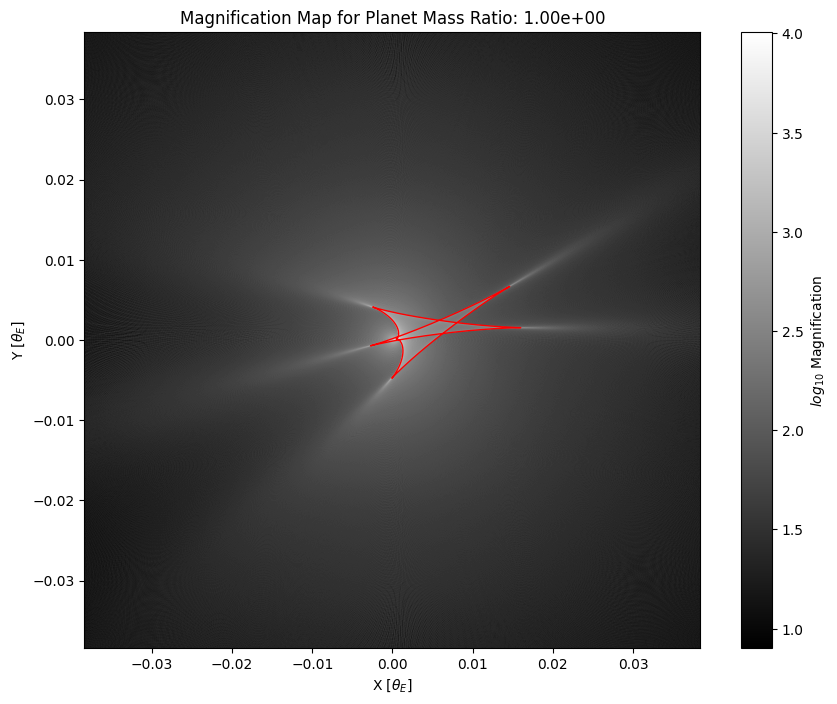

In [24]:
i = 0

# Extracting body positions
star_position = np.array([trinary_lens_attributes_list[i][0][0], trinary_lens_attributes_list[i][0][1]])
big_mass_position = np.array([trinary_lens_attributes_list[i][1][0], trinary_lens_attributes_list[i][1][1]])
small_mass_position = np.array([trinary_lens_attributes_list[i][2][0], trinary_lens_attributes_list[i][2][1]])

# Extracting body masses
star_mass = trinary_lens_attributes_list[i][0][3]
big_mass = trinary_lens_attributes_list[i][1][3]
small_mass = trinary_lens_attributes_list[i][2][3]

# Finding center of mass between two planets
planet_center_of_mass = (big_mass * big_mass_position + small_mass * small_mass_position) / (big_mass + small_mass)

# Calculating and plotting trinary lens magnification map
trinary_mag_map_list[i].show_dev = False
trinary_mag_map_list[i].cmap = cmap
trinary_mag_map_list[i].fig_c, trinary_mag_map_list[i].ax_c = trinary_mag_map_list[i].plot_mags_map()
trinary_mag_map_list[i].ax_c.set_title(f'Magnification Map for Planet Mass Ratio: {trinary_lens_attributes_list[i][2][3] / binary_lens_attributes[1][3]:.2e}')

# trinary_mag_map_list[i].fig_c.savefig('Trinary Mag Map Deviation.png', dpi=500)

# Plotting the star and planets
# trinary_mag_map_list[i].ax_c.plot([star_position[0], small_mass_position[0]], [star_position[1], small_mass_position[1]], color='blue', linestyle='--', linewidth=1)
# trinary_mag_map_list[i].ax_c.plot([star_position[0], big_mass_position[0]], [star_position[1], big_mass_position[1]], color='red', linestyle='--', linewidth=1)

# # Center of mass between the two planets
# trinary_mag_map_list[i].ax_c.plot([star_position[0], planet_center_of_mass[0]], [star_position[1], planet_center_of_mass[1]], color='green', linestyle='--', linewidth=1)

# Plotting VBMicrolensing caustics
trinary_mag_map_list[i].ax_c.plot(trinary_caustics_list[i][0, :], trinary_caustics_list[i][1, :], color='red', linestyle='-', linewidth=1)

plt.show()

In [104]:
import scipy.ndimage as ndi

neighborhood = 5

mag_max = ndi.maximum_filter(binary_mag_map.delta_log, neighborhood)
maxima = binary_mag_map.delta_log == mag_max
mag_min = ndi.minimum_filter(binary_mag_map.delta_log, neighborhood)

threshold = np.amax(binary_mag_map.delta_log) * 0.1

diff = (mag_max - mag_min) > threshold
maxima[diff == 0] = 0

labeled, num_objects = ndi.label(maxima)
slices = ndi.find_objects(labeled)

x, y = [], []

for dy, dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.scatter(x, y)

plt.show()

## Plotting trinary and binary magnification maps on top of each other

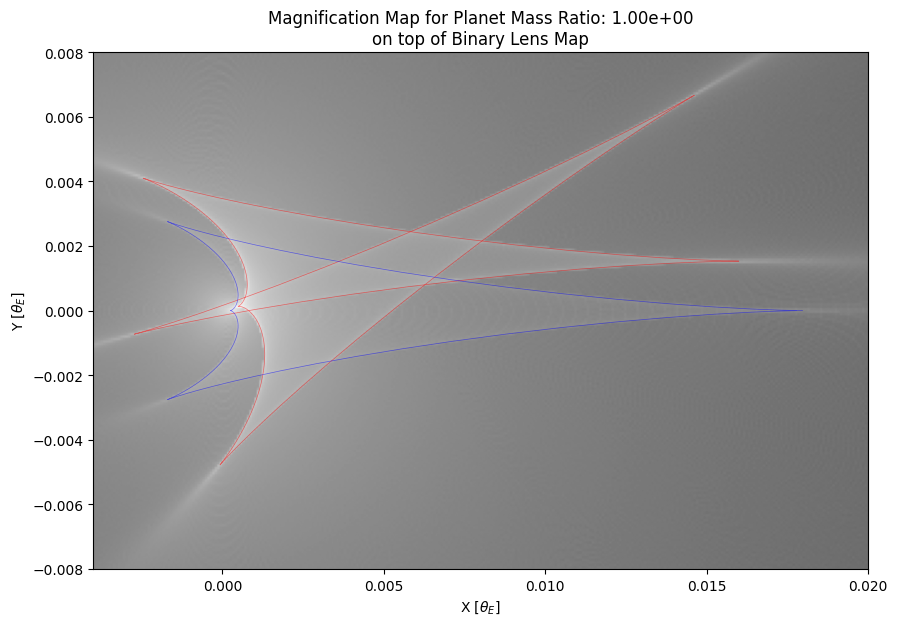

In [25]:
i = 0

# Extracting body positions
star_position = np.array([trinary_lens_attributes_list[i][0][0], trinary_lens_attributes_list[i][0][1]])
big_mass_position = np.array([trinary_lens_attributes_list[i][1][0], trinary_lens_attributes_list[i][1][1]])
small_mass_position = np.array([trinary_lens_attributes_list[i][2][0], trinary_lens_attributes_list[i][2][1]])

# Extracting body masses
star_mass = trinary_lens_attributes_list[i][0][3]
big_mass = trinary_lens_attributes_list[i][1][3]
small_mass = trinary_lens_attributes_list[i][2][3]

# Finding center of mass between two planets
planet_center_of_mass = (big_mass * big_mass_position + small_mass * small_mass_position) / (big_mass + small_mass)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.imshow(binary_mag_map.magnifications_log, cmap=cmap, extent=[-binary_mag_map.ang_width/2, binary_mag_map.ang_width/2, -binary_mag_map.ang_width/2, binary_mag_map.ang_width/2], alpha=0.5)
ax.imshow(trinary_mag_map_list[i].magnifications_log, cmap=cmap, extent=[-binary_mag_map.ang_width/2, binary_mag_map.ang_width/2, -binary_mag_map.ang_width/2, binary_mag_map.ang_width/2], alpha=0.5)

ax.set_title(f'Magnification Map for Planet Mass Ratio: {trinary_lens_attributes_list[i][2][3] / binary_lens_attributes[1][3]:.2e}\non top of Binary Lens Map')
ax.set_xlabel('X [$\\theta_E$]')
ax.set_ylabel('Y [$\\theta_E$]')

# ax.plot([star_position[0], small_mass_position[0]], [star_position[1], small_mass_position[1]], color='blue', linestyle='--', linewidth=1)
# ax.plot([star_position[0], big_mass_position[0]], [star_position[1], big_mass_position[1]], color='red', linestyle='--', linewidth=1)
# ax.plot([star_position[0], planet_center_of_mass[0]], [star_position[1], planet_center_of_mass[1]], color='green', linestyle='--', linewidth=1)

ax.set_xlim(-0.004, 0.02)
ax.set_ylim(-0.008, 0.008)

ax.plot(trinary_caustics_list[i][0, :], trinary_caustics_list[i][1, :], color='red', linestyle='-', linewidth=0.5, alpha=0.5)

ax.plot(binary_caustics[0, :], binary_caustics[1, :], color='blue', linestyle='-', linewidth=0.5, alpha=0.5)

# fig.savefig('Binary and Trinary Magnification Map.png', dpi=500)

plt.show()

In [26]:
def find_cusp_points(caustic_points):
    points = caustic_points.T  # Shape: (400, 2)

    vectors = np.diff(points, axis=0)  # Shape: (399, 2)

    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    unit_vectors = vectors / norms

    dot_products = np.sum(unit_vectors[:-1] * unit_vectors[1:], axis=1)
    dot_products = np.clip(dot_products, -1.0, 1.0)  # Clip to avoid numerical errors
    angles = np.rad2deg(np.arccos(dot_products))  # In degrees

    cusp_indices = np.where(angles > 120)[0] + 1  # +1 to shift to the index of the corner point

    print(angles[cusp_indices-1])

    return caustic_points[0, cusp_indices], caustic_points[1, cusp_indices]

In [148]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

i = 5

binary_xs, binary_ys = find_cusp_points(binary_caustics)
trinary_xs, trinary_ys = find_cusp_points(trinary_caustics_list[i])

binary_distances = np.sqrt(binary_xs**2 + binary_ys**2)
binary_closest_idx = np.argmin(binary_distances)

trinary_distances = np.sqrt(trinary_xs**2 + trinary_ys**2)
trinary_closest_idx = np.argmin(trinary_distances)

ax.plot(trinary_caustics_list[i][0, :], trinary_caustics_list[i][1, :], color='red', linestyle='-', linewidth=0.5, alpha=0.5)
ax.plot(binary_caustics[0, :], binary_caustics[1, :], color='blue', linestyle='-', linewidth=0.5, alpha=0.5)

ax.scatter(binary_xs, binary_ys, color='green', s=1)
ax.scatter(trinary_xs, trinary_ys, color='green', s=1)

ax.scatter(binary_xs[binary_closest_idx], binary_ys[binary_closest_idx], color='black', s=50, marker='o', facecolor='none')
ax.scatter(trinary_xs[trinary_closest_idx], trinary_ys[trinary_closest_idx], color='black', s=50, marker='o', facecolor='none')

plt.show()

[176.72892833 178.79999479 176.72892833]
[178.78792377 178.74008065 178.8000181  178.7307212  178.68357461]


## Plotting individual fractional difference maps

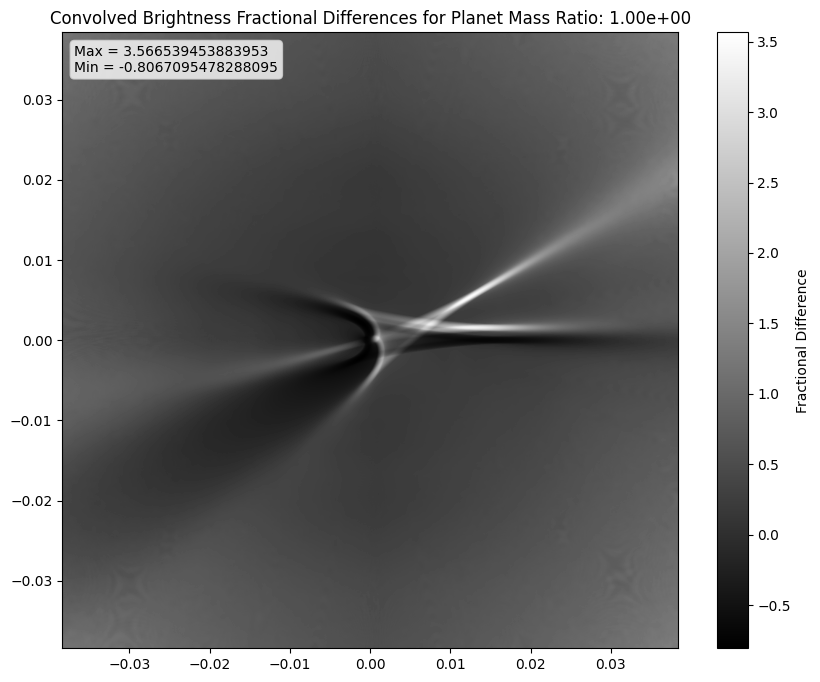

In [27]:
i = 0

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.set_title(f'Convolved Brightness Fractional Differences for Planet Mass Ratio: {trinary_lens_attributes_list[i][2][3] / binary_lens_attributes[1][3]:.2e}')
img = ax.imshow(convolved_brightness_differences_list[i], cmap=cmap, extent=[-binary_mag_map.ang_width/2, binary_mag_map.ang_width/2, -binary_mag_map.ang_width/2, binary_mag_map.ang_width/2])
bar = fig.colorbar(img, location='right')
bar.set_label('Fractional Difference')

props = dict(boxstyle='round', facecolor='white', edgecolor='lightgray', alpha=0.8)
ax.text(0.02, 0.98, f'Max = {round(np.max(convolved_brightness_differences_list[i]), 18)}\nMin = {round(np.min(convolved_brightness_differences_list[i]), 18)}', va='top', zorder=10, bbox=props, transform=ax.transAxes)

plt.show()

## Plotting the deviation for each trinary configuration

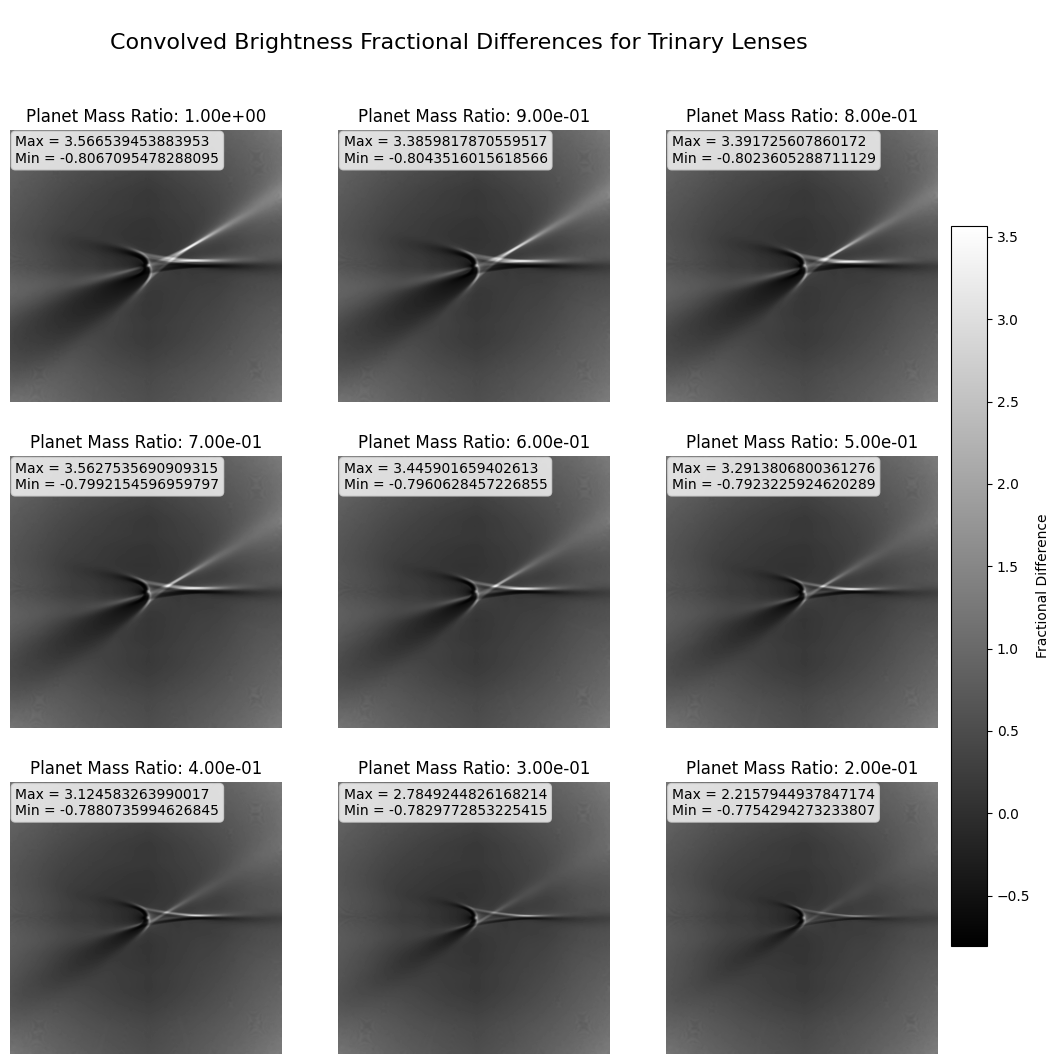

In [28]:
fig = plt.figure(figsize=(12, 12))
axes = fig.subplots(3, 3)

fig.suptitle('\nConvolved Brightness Fractional Differences for Trinary Lenses', fontsize=16)

for i in range(len(trinary_lens_attributes_list)):
    if i < 3:
        ax = axes[0, i]
    elif i < 6:
        ax = axes[1, i-3]
    else:
        ax = axes[2, i-6]

    img = ax.imshow(convolved_brightness_differences_list[i], cmap=cmap, extent=[-binary_mag_map.ang_width/2, binary_mag_map.ang_width/2, -binary_mag_map.ang_width/2, binary_mag_map.ang_width/2], vmin=absolute_min, vmax=absolute_max)
    
    ax.set_title(f"Planet Mass Ratio: {trinary_lens_attributes_list[i][2][3] / binary_lens_attributes[1][3]:.2e}")
    # ax.set_xlabel('X [$\\theta_E$]')
    # ax.set_ylabel('Y [$\\theta_E]$')
    ax.axis('off')
    ax.set_xlim(-binary_mag_map.ang_width/2, binary_mag_map.ang_width/2)
    ax.set_ylim(-binary_mag_map.ang_width/2, binary_mag_map.ang_width/2)

    props = dict(boxstyle='round', facecolor='white', edgecolor='lightgray', alpha=0.8)
    ax.text(0.02, 0.98, f'Max = {round(np.max(convolved_brightness_differences_list[i]), 18)}\nMin = {round(np.min(convolved_brightness_differences_list[i]), 18)}', va='top', zorder=10, bbox=props, transform=ax.transAxes)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar_ax.axis('off')

bar = fig.colorbar(img, ax=cbar_ax, location='right', fraction=1.5, aspect=20)
bar.set_label('Fractional Difference')

# fig.savefig('Trinary Lens Convolved Convolved Fractional Difference.png', dpi=500)

plt.show()

## Defining source trajectory

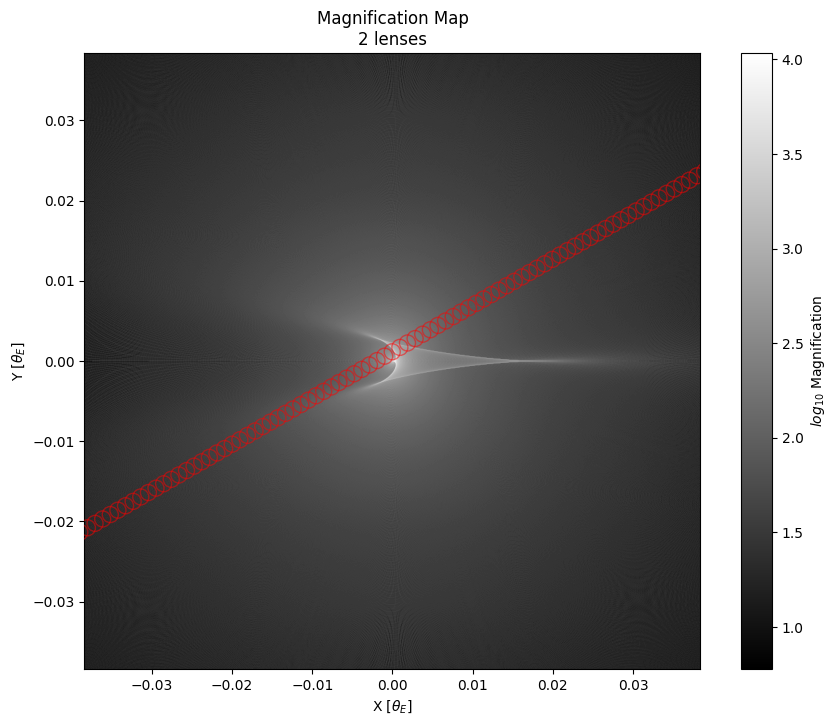

In [29]:
plt.close('all')

binary_mag_map.fig_c, binary_mag_map.ax_c = binary_mag_map.plot_mags_map()

# Removing any present lines from magnification map
for child in binary_mag_map.ax_c.get_children():
    if isinstance(child, (collections.PathCollection, collections.PatchCollection)):
        child.remove()

# Impact parameter
u = 0.001

# Angle from x axis
alpha = 30

# Number of points
num_points = 100

# Discretizing the source trajectory
xs_prime = np.linspace(-binary_mag_map.ang_width/np.sqrt(2), binary_mag_map.ang_width/np.sqrt(2), num_points).reshape(1, num_points)
ys_prime = np.ones((1, num_points)) * u

points_prime = np.vstack((xs_prime, ys_prime))

# Rotating the source trajectory
rotation_matrix = np.array([[np.cos(np.radians(alpha)), -np.sin(np.radians(alpha))],
                            [np.sin(np.radians(alpha)), np.cos(np.radians(alpha))]])

points = np.dot(rotation_matrix, points_prime)

# Extracting x and y coordinates
xs = points[0]
ys = points[1]

# Plotting the source trajectory
circles = [patches.Circle((x, y), radius=radius, color='red', alpha=0.5, fill=False) for x, y in zip(xs, ys)]
c = collections.PatchCollection(circles, match_original=True, zorder=50)
binary_mag_map.ax_c.add_collection(c)
# binary_mag_map.ax_c.scatter(xs, ys, s=radius, color='red', zorder=50)

plt.show()

## Defining a function to calculate the starting and ending points of source trajectory on the bounding box of magnification map given impact parameter and angle from x axis

In [30]:
def get_line_box_intersections(u, alpha, W):
    alpha = np.deg2rad(alpha)
    
    intersections = []

    # Starting point of line
    x0 = -u * np.sin(alpha)
    y0 = u * np.cos(alpha)

    # Direction vector of line
    dx = np.cos(alpha)
    dy = np.sin(alpha)

    # Vertical edges
    for x_edge in [-W/2, W/2]:
        t = (x_edge - x0) / dx
        y = y0 + t*dy
        if -W/2 <= y <= W/2:
            intersections.append((x_edge, y))
    
    # Horizontal edges
    for y_edge in [-W/2, W/2]:
        t = (y_edge - y0) / dy
        x = x0 + t*dx
        if -W/2 <= x <= W/2:
            intersections.append((x, y_edge))
    
    return intersections

499.5
[ -1. 225.]
[999. 803.]
[226 226 227 227 228 228 229 230 230 231 231 232 233 233 234 234 235 235
 236 237 237 238 238 239 239 240 241 241 242 242 243 243 244 245 245 246
 246 247 248 248 249 249 250 250 251 252 252 253 253 254 254 255 256 256
 257 257 258 259 259 260 260 261 261 262 263 263 264 264 265 265 266 267
 267 268 268 269 270 270 271 271 272 272 273 274 274 275 275 276 276 277
 278 278 279 279 280 280 281 282 282 283 283 284 285 285 286 286 287 287
 288 289 289 290 290 291 291 292 293 293 294 294 295 296 296 297 297 298
 298 299 300 300 301 301 302 302 303 304 304 305 305 306 306 307 308 308
 309 309 310 311 311 312 312 313 313 314 315 315 316 316 317 317 318 319
 319 320 320 321 322 322 323 323 324 324 325 326 326 327 327 328 328 329
 330 330 331 331 332 333 333 334 334 335 335 336 337 337 338 338 339 339
 340 341 341 342 342 343 343 344 345 345 346 346 347 348 348 349 349 350
 350 351 352 352 353 353 354 354 355 356 356 357 357 358 359 359 360 360
 361 361 362 363 363 

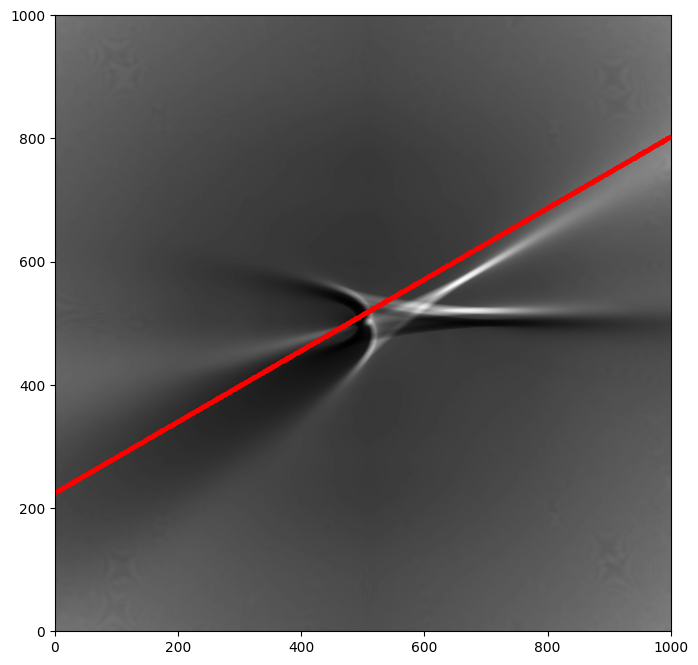

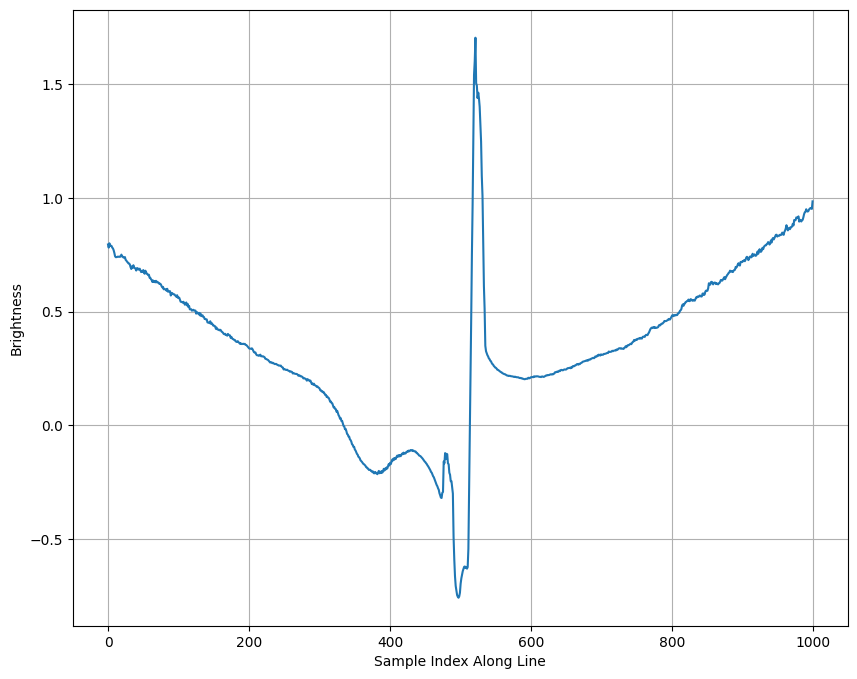

In [ ]:
from skimage.draw import line

# Get the intersections of the line with the box edges
intersections = get_line_box_intersections(u, alpha, binary_mag_map.ang_width)

start = intersections[0]
end = intersections[1]

brightnesses = convolved_brightness_differences_list[0]

offset = (binary_mag_map.pixels - 1) / 2.0

print(offset)

start = np.floor(start/binary_mag_map.ang_res + offset)
end = np.floor(end/binary_mag_map.ang_res + offset)

# Get line pixel coordinates
rr, cc = line(int(start[1]), int(start[0]), int(end[1]), int(end[0]))

# Get brightness values along the line
line_values = brightnesses[rr[1:], cc[1:]]

print(np.shape(line_values))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.imshow(brightnesses, cmap=cmap, extent=[0, binary_mag_map.pixels, 0, binary_mag_map.pixels])
ax.scatter(cc[1:], rr[1:], s=5, color='red')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.plot(line_values)
ax.set_xlabel("Sample Index Along Line")
ax.set_ylabel("Brightness")
ax.grid(True)

plt.show()

In [85]:
print(line_values[2500])
print(brightnesses[2500, 2500])

549335.1527695112
903379.017067694


## Extra stuff

In [86]:
from scipy.ndimage import map_coordinates

# Define start and end points of the line (row, col) format
start = np.array([10, 20])
end = np.array([80, 70])

# Number of samples along the line (increase for higher resolution)
num_samples = 1000

# Interpolate positions along the line
rows = np.linspace(start[0], end[0], num_samples)
cols = np.linspace(start[1], end[1], num_samples)

# Create a 2 x N array of coordinates (row-major format)
coords = np.vstack((rows, cols))

# Interpolate brightness values at these coordinates
interpolated_values = map_coordinates(brightnesses, coords, order=3)

# Plot for visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.imshow(brightnesses, extent=[0, 100, 0, 100])
ax.scatter(cols, rows, s=5, color='red')
ax.set_title("Interpolated Line Across Brightness Array")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
# Plot interpolated brightness along the line
ax.plot(interpolated_values)
ax.set_title("Interpolated Brightness Along the Line")
ax.set_xlabel("Sample Index Along Line")
ax.set_ylabel("Brightness")
ax.grid(True)
plt.show()

In [87]:
get_line_box_intersections(0.1, 30, 1)

[(-0.5, np.float64(-0.17320508075688762)),
 (0.5, np.float64(0.404145188432738))]

In [88]:
def compute_fractional_circle_sum_centered(brightness, x_center, y_center, radius, ax, supersample=10):
    """
    Compute the brightness sum within a circle of given radius, centered at (x_center, y_center),
    using a coordinate system where (0, 0) lies at the center of the grid, properly accounting
    for even/odd grid dimensions.

    Parameters:
        brightness (2D array): Brightness grid (H, W)
        x_center, y_center (float): Circle center in (0, 0)-centered coordinates
        radius (float): Radius of the circle
        supersample (int): Supersampling rate (e.g. 10 means 10x10 subpixels per pixel)

    Returns:
        float: Weighted sum of brightness inside the circle
    """
    i_time = t.time()
    # Converting to pixel coordinates
    x_center = x_center / binary_mag_map.ang_res
    y_center = y_center / binary_mag_map.ang_res
    radius = radius / binary_mag_map.ang_res

    H, W = brightness.shape
    y_offset = (H - 1) / 2.0
    x_offset = (W - 1) / 2.0

    # Get bounds in pixel indices
    j_min = int(np.floor(x_center + x_offset - radius))
    j_max = int(np.ceil(x_center + x_offset + radius))
    i_min = int(np.floor(y_center + y_offset - radius))
    i_max = int(np.ceil(y_center + y_offset + radius))

    # Supersampling offsets within a pixel
    ss = supersample
    offsets = np.linspace(-0.5 + 0.5 / ss, 0.5 - 0.5 / ss, ss)
    sub_x, sub_y = np.meshgrid(offsets, offsets)

    print(t.time() - i_time)

    total = 0.0

    i_time = t.time()
    for i in range(i_min, i_max + 1):
        for j in range(j_min, j_max + 1):
            if 0 <= i < H and 0 <= j < W:
                # Physical center of pixel (i, j)
                x = j - x_offset
                y = i - y_offset
                
                # Check if the pixel center is within the circle
                if (x - x_center)**2 + (y - y_center)**2 < (radius + 1/np.sqrt(2))**2:

                    # ax.scatter(x*binary_mag_map.ang_res, y*binary_mag_map.ang_res, s=50, marker='+')

                    dx = x + sub_x - x_center
                    dy = y + sub_y - y_center

                    # ax.scatter((dx+x_center)*binary_mag_map.ang_res, (dy+y_center)*binary_mag_map.ang_res, s=1)

                    distances_squared = dx**2 + dy**2
                    fraction = np.sum(distances_squared <= radius**2) / (ss * ss)

                    total += brightness[i, j] * fraction
    
    print(t.time() - i_time)

    return total


In [89]:
# Random 2D brightness grid
# brightness = binary_mag_map.magnifications
brightness = convolved_binary_brightnesses

In [90]:
# Circle parameters
x_center = 0.0141
y_center = 0.001
radius = 1e-3

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.imshow(brightness, extent=[-binary_mag_map.ang_width/2, binary_mag_map.ang_width/2, -binary_mag_map.ang_width/2, binary_mag_map.ang_width/2])

# Compute brightness sum
result = compute_fractional_circle_sum_centered(brightness, x_center, y_center, radius, ax, supersample=10)
print('\nResult:', result)

circle = patches.Circle((x_center, y_center), radius=radius, edgecolor='red', fill=True, alpha=0.5, facecolor='gray')
ax.add_patch(circle)

plt.show()

7.987022399902344e-05
0.0809640884399414

Result: 668477773.6380467


In [91]:
# Circle parameters
x_center = 0.0141
y_center = 0.001
radius = 1e-3

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.imshow(brightness, extent=[-binary_mag_map.ang_width/2, binary_mag_map.ang_width/2, -binary_mag_map.ang_width/2, binary_mag_map.ang_width/2])

# Compute brightness sum
result = compute_fractional_circle_sum_centered(brightness, x_center, y_center, radius, ax, supersample=10)
print('\nResult:', result)

circle = patches.Circle((x_center, y_center), radius=radius, edgecolor='red', fill=True, alpha=0.5, facecolor='gray')
ax.add_patch(circle)

plt.show()

7.081031799316406e-05
0.0813300609588623

Result: 668477773.6380467
